# Stock price prediction - Machine Learning + Backtest

In [18]:
#Dieses Programm sagt Aktienkursbewegungen vorher mit Hilfe von Machine Learning
#Hierbei trainiert das Modell auf Grundlage von technischen Indikatoren

## 1.) Data Preparation

In [19]:
conda install -c conda-forge ta-lib

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [20]:
conda install -c conda-forge matplotlib

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [22]:
conda install -c anaconda pandas-datareader

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38hecd8cb5_0        14.4 MB
    ------------------------------------------------------------
                                           Total:        14.4 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.11.0-py38h50d173~ --> pkgs/main::conda-4.11.0-py38hecd8cb5_0



conda-4.11.0         | 14.4 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import talib as ta  #Bib für die technische Analyse
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
start = "2018-01-01"
end = "2020-01-01"

In [62]:
assets = "FB", "AMZN", "AAPL", "NFLX", "GOOG" #Aktien für das Training

In [63]:
for asset in assets:
    exec("{} = web.DataReader(asset, data_source='yahoo', start = start, end = end)".format(asset))

In [64]:
asset_list = [FB, AMZN, AAPL, NFLX, GOOG]

### Funktion definieren für die Berechnung 

In [65]:
def indikator(asset):
    asset["RSI"] = ta.RSI(asset["Close"], timeperiod = 14) #Momentumindikator
    asset["ROC"] = ta.ROC(asset["Close"], timeperiod = 10)
    asset ["%R"] = ta.WILLR(asset["High"], asset["Low"], asset["Close"], timeperiod = 14)
    asset["OBV"] = ta.OBV(asset["Close"], asset["Volume"]) #Volumindikator, On balanced volume 
    asset["MACD"], asset["MACD_SIGNAL"], asset["MACD_HIST"] = ta.MACD(asset["Close"], fastperiod=12, slowperiod=26, signalperiod=9)
    
    #prediction column erzeugen
    asset["Prediction"] = np.where(asset["Close"].shift(-5) > asset["Close"], 1, -1)
    
    # wenn der Wert in 5 Tagen höher ist als der Wert heute, dann wird eine 1 übergeben.
    # Sollte der Wert niedriger sein, dann wird eine -1 übergeben 
    

In [66]:
 #Funktion verwenden um für alle Dataframes die Berechnung durchzuführen 
for asset in asset_list:
    indikator(asset)

In [69]:
FB.head(10)

,High,Low,Open,Close,Volume,Adj Close,RSI,ROC,%R,OBV,MACD,MACD_SIGNAL,MACD_HIST,Prediction
Date,,,,,,,,,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998,NaN,NaN,NaN,18151900.0,NaN,NaN,NaN,1
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998,NaN,NaN,NaN,35038500.0,NaN,NaN,NaN,1
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002,NaN,NaN,NaN,21157600.0,NaN,NaN,NaN,1
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006,NaN,NaN,NaN,34732100.0,NaN,NaN,NaN,-1
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999,NaN,NaN,NaN,52726800.0,NaN,NaN,NaN,-1
2018-01-09,188.800003,187.100006,188.699997,187.869995,12393100,187.869995,NaN,NaN,NaN,40333700.0,NaN,NaN,NaN,-1
2018-01-10,187.889999,185.630005,186.940002,187.839996,10529900,187.839996,NaN,NaN,NaN,29803800.0,NaN,NaN,NaN,-1
2018-01-11,188.399994,187.380005,188.399994,187.770004,9588600,187.770004,NaN,NaN,NaN,20215200.0,NaN,NaN,NaN,-1
2018-01-12,181.479996,177.399994,178.059998,179.369995,77551300,179.369995,NaN,NaN,NaN,-57336100.0,NaN,NaN,NaN,1


In [ ]:
#Unser Close ist in 5 Tage höher als an dem Zeitpunkt. --> 1. Zeile


In [33]:
df = FB.append((AMZN, AAPL, NFLX, GOOG))

In [34]:
df

,High,Low,Open,Close,Volume,Adj Close,RSI,ROC,%R,OBV,MACD,MACD_SIGNAL,MACD_HIST,Prediction
Date,,,,,,,,,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151903.0,181.419998,NaN,NaN,NaN,18151903.0,NaN,NaN,NaN,1
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886563.0,184.669998,NaN,NaN,NaN,35038466.0,NaN,NaN,NaN,1
2018-01-04,186.210007,184.099594,184.899994,184.330002,13880896.0,184.330002,NaN,NaN,NaN,21157570.0,NaN,NaN,NaN,1
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574535.0,186.850006,NaN,NaN,NaN,34732105.0,NaN,NaN,NaN,-1
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994726.0,188.279999,NaN,NaN,NaN,52726831.0,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059,347518.0,1343.560059,58.411350,-0.081803,-44.151391,7717155.0,14.802758,16.455812,-1.653053,-1
2019-12-26,1361.326904,1344.469971,1346.170044,1360.400024,667754.0,1360.400024,65.243314,1.143478,-14.575307,8384909.0,14.930346,16.150718,-1.220372,-1
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038718.0,1351.890015,59.889141,0.119976,-45.269347,7346191.0,14.181301,15.756835,-1.575534,-1


In [35]:
#NaN Values entfernen, da diese dem Modell nicht zu übergeben sind
df.dropna(inplace = True)

In [36]:
df

,High,Low,Open,Close,Volume,Adj Close,RSI,ROC,%R,OBV,MACD,MACD_SIGNAL,MACD_HIST,Prediction
Date,,,,,,,,,,,,,,
2018-02-20,177.949997,175.110001,175.770004,176.009995,21204921.0,176.009995,44.022479,-2.896392,-68.621190,-32824291.0,-1.764779,-0.725625,-1.039154,1
2018-02-21,181.270004,176.399994,176.710007,177.910004,23200804.0,177.910004,46.519752,-3.993305,-61.869206,-9623487.0,-1.754503,-0.931401,-0.823102,1
2018-02-22,180.210007,177.410004,178.699997,178.990005,18464192.0,178.990005,47.941419,-0.660444,-56.307781,8840705.0,-1.640303,-1.073181,-0.567122,-1
2018-02-23,183.389999,179.509995,179.899994,183.289993,19007288.0,183.289993,53.267977,6.824800,-31.242018,27847993.0,-1.189119,-1.096369,-0.092750,-1
2018-02-26,185.660004,183.222794,184.580002,184.929993,17599703.0,184.929993,55.152718,5.008229,-4.518618,45447696.0,-0.691249,-1.015345,0.324096,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059,347518.0,1343.560059,58.411350,-0.081803,-44.151391,7717155.0,14.802758,16.455812,-1.653053,-1
2019-12-26,1361.326904,1344.469971,1346.170044,1360.400024,667754.0,1360.400024,65.243314,1.143478,-14.575307,8384909.0,14.930346,16.150718,-1.220372,-1
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038718.0,1351.890015,59.889141,0.119976,-45.269347,7346191.0,14.181301,15.756835,-1.575534,-1


In [37]:
#Aufteilung der Daten in x und y Werte und ausführen eines Train-Testsplit

from sklearn.model_selection import train_test_split

X = df[["RSI", "ROC", "OBV", "%R", "MACD", "MACD_SIGNAL", "MACD_HIST"]]
y = df["Prediction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8, test_size=0.2)



In [38]:
#Erstellung des Machine Learning Modells und Ausführung der Vorhersagen.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators = 1000, oob_score = True, criterion = "gini", random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [39]:
print("Korrekte Vorhersage in %: ", accuracy_score(y_test, y_pred, normalize = True)*100)

Korrekte Vorhersage in %:  72.5531914893617


In [40]:
#Das Modell hat eine Vorhersage von ca. 71% erzielt, anhand der ausgewählten Indikatoren.

In [41]:
#Modell testen auf unbekannte Daten, anhand eines anderen Unternehmens und einer anderen Zeitperiode.
#Auf die unbekannten Daten Vorhersagen treffen lassen.

In [42]:
#Aktie auswählen
test_stock = web.DataReader("NVDA", data_source="yahoo", start="2020-01-01", end = "2021-01-17") #sind aus demselben techn. Sektor

In [43]:
indikator(test_stock)

In [44]:
test_stock.dropna(inplace=True)

In [45]:
test_stock["Predicted"] = model.predict(test_stock[["RSI", "ROC", "%R", "OBV", "MACD", "MACD_SIGNAL", "MACD_HIST"]])

In [46]:
test_stock.head(10)

,High,Low,Open,Close,Volume,Adj Close,RSI,ROC,%R,OBV,MACD,MACD_SIGNAL,MACD_HIST,Prediction,Predicted
Date,,,,,,,,,,,,,,,
2020-02-20,316.320007,296.350006,312.765015,308.700012,20251259.0,308.436371,77.593219,23.105766,-9.341663,110239047.0,14.903575,7.262212,7.641362,-1,-1
2020-02-21,305.200012,290.660004,304.190002,294.070007,19232331.0,293.818878,65.716331,15.664030,-27.513289,91006716.0,14.901127,8.789995,6.111132,-1,-1
2020-02-24,281.872314,268.000000,270.190002,273.279999,21422873.0,273.046661,53.244074,8.621170,-59.529747,69583843.0,13.070934,9.646183,3.424751,1,-1
2020-02-25,278.790009,257.959991,276.303497,262.049988,26387442.0,261.826233,47.950213,-0.349855,-78.754922,43196401.0,10.592223,9.835391,0.756832,1,1
2020-02-26,275.450012,262.000000,262.059998,267.649994,18741536.0,267.421387,50.588502,-0.089597,-72.167870,61937937.0,8.976229,9.663559,-0.687329,1,1
2020-02-27,267.000000,248.889999,254.899994,252.600006,22660373.0,252.421997,44.116525,-7.316358,-94.497989,39277564.0,6.407275,9.012302,-2.605027,1,1
2020-02-28,272.459991,241.789993,242.455002,270.070007,28366882.0,269.879730,51.821632,-0.262202,-62.055536,67644446.0,5.715162,8.352874,-2.637712,-1,1
2020-03-02,277.589996,261.000000,276.899994,276.429993,22268639.0,276.235199,54.292398,-4.610240,-53.522081,89913085.0,5.615128,7.805325,-2.190197,-1,1
2020-03-03,281.070007,262.460114,278.666504,265.890015,16319828.0,265.702637,49.739872,-10.344941,-67.664005,73593257.0,4.631967,7.170653,-2.538686,-1,1


In [47]:
#Das Modell hat anhand der technischen Indikatoren den Wert berechnet.
#1. Zeile = Predicted also -1 ist ist korrekt, da der Adj. Close 
#mit 308.19 vorhergesagt wurde. Und der Wert nach 5 Tagen unter diesem Wert lag.
#Stimmt überein mit der festgelegten Prediction, die festgelegt wurde


In [48]:
#Vorhersage auf unbekannte Daten und diese sind zu testen.
#Wenn das Modell feststellt, dass der Wert einer Aktie in 5 Tagen sinkt, soll er dementsprechnd handeln.
#Kauf- und Verkaufssignale ausgeben.

In [49]:
def buy_sell(asset):
    BuyPrice = []
    SellPrice = []
    flag = -1 #Funktion nachprüfen lassen, ob man schon an einem bestimmten Punkt war. Sollte das der Fall sein ist die flag zu ändern.
    counter = 0
    n = 5 #5 Zeitschritte warten, bis die Vorhersage geändert werden kann
    
    for i in range(len(asset)):
        if asset["Predicted"][i] ==1 and counter ==0:
            if flag !=1:
                BuyPrice.append(asset["Close"][i])
                SellPrice.append(np.nan)
                flag = 1
            else:
                BuyPrice.append(np.nan)
                SellPrice.append(np.nan)
        elif asset["Predicted"][i] ==-1 and counter ==0:
            if flag != 0:
                BuyPrice.append(np.nan)
                SellPrice.append(asset["Close"][i])
                flag = 0
            else:
                BuyPrice.append(np.nan)
                SellPrice.append(np.nan)
        else:
            BuyPrice.append(np.nan)
            SellPrice.append(np.nan)
        
        counter +=1
        if counter == n:
            counter = 0
            
    return (BuyPrice, SellPrice)
    

In [50]:
buysell = buy_sell(test_stock)

In [51]:
test_stock["Buy"] = buysell[0]
test_stock["Sell"]= buysell[1]

In [52]:
#Als erstes eine Buy Ordner ausführen, weil zu t0 verfügt man noch nicht über Aktien.
test_stock["Sell"][0] = np.nan

<ipython-input-52-7b74848de769>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_stock["Sell"][0] = np.nan


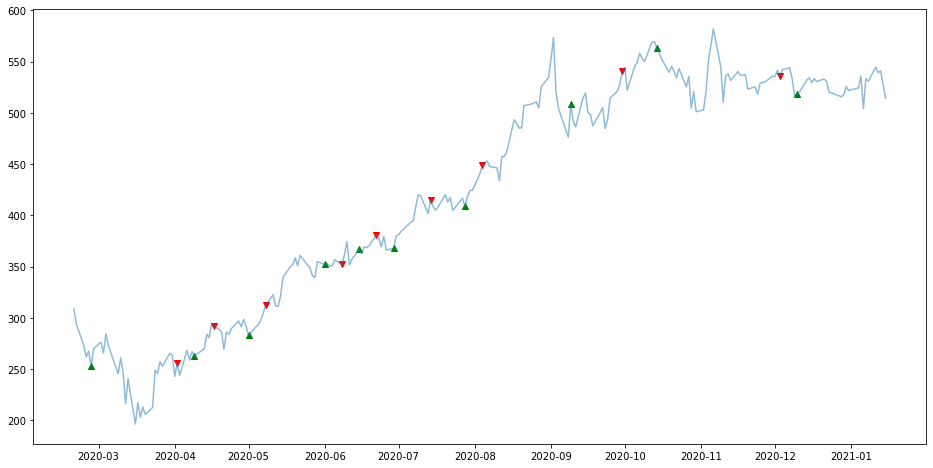

In [53]:
plt.figure(figsize=(16,8))
plt.scatter(test_stock.index, test_stock["Buy"], color = "green", label = "Buy", marker= "^", alpha = 1)
plt.scatter(test_stock.index, test_stock["Sell"], color = "red", label = "Sell", marker="v", alpha = 1)
plt.plot(test_stock.index, test_stock["Adj Close"], alpha = 0.5) #Close Price
plt.show()

In [54]:
#Die blaue Linie ist der Close Price über den Zeitraum 2020 bis 2021.
#Signal (grün) den der Algorithmus vorhergesagt hat, zudem ein Kauf getätigt werden sollte und bei rot sollte man wieder verkaufen.
#5 Tage warten, bis die Meinung gerändert werden kann. 
#Kommt es in den 5 Tagen nochmal zu einem Kaufsignal, wird es übersprungen.

### Hypothetische Summe an Geld dem Algorithmus mitgeben
##### Geldentwicklung betrachten

In [55]:
def performance(data):
    performance = [1000000] #Startkapital auf 1. Million setzten.
    num_stocks = 0 
    
    for i in range(len(data)):
        if math.isnan(data["Buy"][i])== False: #im Buy ein nan value, dann Kauf
            num_stocks = performance[i]/data["Close"][i] #zum Tagesaktuellen Close Preis Aktien kaufen
            performance.append(num_stocks*data["Close"][i])
        elif math.isnan(data["Sell"][i]) == False:
            cash = num_stocks * data["Close"][i]
            performance.append(cash)
        else:
            performance.append(performance[i])
    
    return performance

In [56]:
test_stock_performance = performance(test_stock)

In [57]:
test_stock_performance

[1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1011361.81729153,
 1011361.81729153,
 1011361.81729153,
 1011361.81729153,
 1011361.81729153,
 1011361.81729153,
 1011361.81729153,
 1011361.81729153,
 1011361.81729153,
 1011361.81729153,
 1124325.0812451942,
 1124325.0812451942,
 1124325.0812451942,
 1124325.0812451942,
 1124325.0812451942,
 1124325.0812451942,
 1124325.0812451942,
 1124325.0812451942,
 1124325.0812451942,
 1124325.0812451942,
 1124325.0812451942,
 1124325.0812451942,
 1124325.0812451942,
 1124325.0812451942,
 1124325.0812451942,
 1242490.944924803,
 1242490.944924803,
 1242490.944924803,
 1242490.944924803,
 1242490.944924803,
 1242490.944924803,
 1242490.944924

No handles with labels found to put in legend.


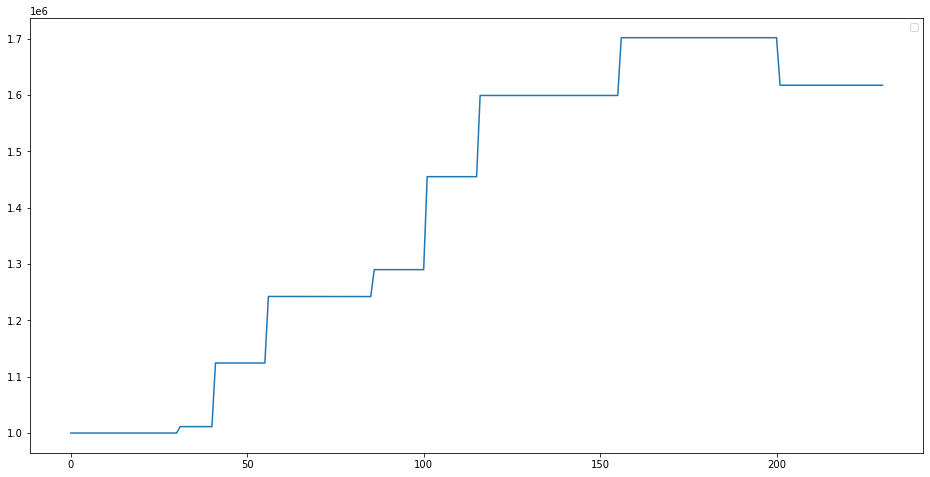

In [58]:
plt.figure(figsize=(16,8))
plt.plot(test_stock_performance)

In [ ]:
#Das Geld hat sich hypotheisch gut entwickelt. Gut gekauft und seht gut verkauft.
#Bei ca. 180 hat er sich etwas verschätzt und etwas Geld verloren. Und am Ende wieder gut geschätzt.